In [1]:
#載入套件
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#載入CIFAR10資料集(x:特徵,y:標籤)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
#訓練集:50000筆32*32的rgb圖片，測試集:10000筆32*32的rgb圖片
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#訓練集第一張圖片的資料
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
#各圖片類別
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
#第一張圖片是青蛙
print(y_train[0])

[6]


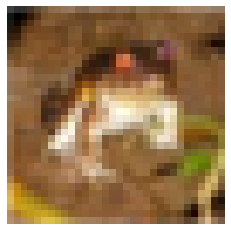

In [7]:
#顯示第一張圖片
plt.imshow(x_train[0],cmap='binary')
plt.axis("off")
plt.show()

In [8]:
#訓練資料正規化
x_train_normalize=x_train.astype("float64")/255
x_test_normalize=x_test.astype("float64")/255

In [9]:
#測試資料轉換為One-Hot-Encoding
y_train_onehot=to_categorical(y_train)
y_test_onehot=to_categorical(y_test)

In [10]:
#建立CNN模型
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten()) 
model.add(Dense(512,activation="relu")) 
model.add(Dense(10,activation="softmax"))

In [11]:
#模型簡介
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [12]:
#定義模型優化器、損失函數、績效指標
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
#模型訓練
cnn=model.fit(x_train_normalize,y_train_onehot,validation_split=0.2,epochs=10,batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 17s 5ms/step - loss: 1.4116 - accuracy: 0.4882 - val_loss: 1.0677 - val_accuracy: 0.6253
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9737 - accuracy: 0.6564 - val_loss: 0.8861 - val_accuracy: 0.6961
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7860 - accuracy: 0.7239 - val_loss: 0.7978 - val_accuracy: 0.7224
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6370 - accuracy: 0.7757 - val_loss: 0.7728 - val_accuracy: 0.7362
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5125 - accuracy: 0.8187 - val_loss: 0.8402 - val_accuracy: 0.7315
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3929 - accuracy: 0.8614 - val_loss: 0.8748 - val_accuracy: 0.7359
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2931 - accuracy: 0.8950 - val_loss: 0.9481 - val_accuracy

In [14]:
#定義圖表繪製方法
def cnn_plot(cnn,cnn_1,cnn_2,y_label):
  plt.plot(cnn.history[cnn_1])
  plt.plot(cnn.history[cnn_2])
  plt.title('train history')
  plt.xlabel('epochs')
  plt.ylabel(y_label)
  plt.legend( ['train','validation'],loc='upper left')
  plt.show()

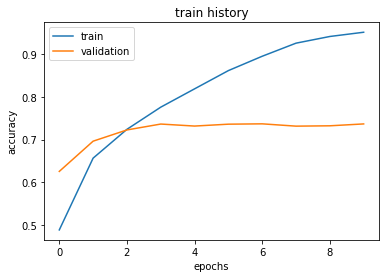

In [15]:
#繪製準確率圖表
accuracy_graphic=cnn_plot(cnn,'accuracy','val_accuracy','accuracy')

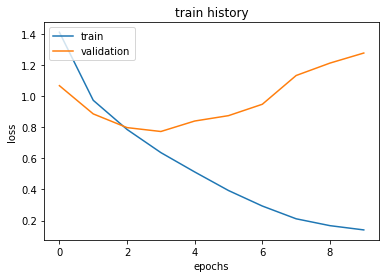

In [16]:
#繪製損失函數圖表
loss_graohic=cnn_plot(cnn,'loss','val_loss','loss' )

In [17]:
#模型績效評估
evaluate=model.evaluate(x_test_normalize,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 1.3165 - accuracy: 0.7236


In [18]:
#利用測試資料進行圖片辨識
pred=np.argmax(model.predict(x_test_normalize),axis=1)
print(pred)#顯示所有圖片辨識結果

[3 8 8 ... 5 4 7]


In [19]:
#將辨識的數值轉換為文字
pred_description=list(map(lambda x:classes[x],pred))
print(pred_description[20:30])#顯示第20到第30張圖片辨識結果

['horse', 'bird', 'deer', 'truck', 'deer', 'bird', 'bird', 'airplane', 'truck', 'frog']


In [20]:
#觀察辨識錯誤的資料
y_test_label=y_test.reshape(-1)
pd.crosstab(y_test_label,pred,colnames=['Prediction'],rownames=['label'])

Prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,767,21,53,22,19,7,16,6,48,41
1,14,827,9,14,6,2,13,2,23,90
2,58,10,639,66,83,24,87,16,8,9
3,17,8,98,565,62,135,68,20,11,16
4,24,6,60,102,665,21,60,51,8,3
5,12,2,76,215,53,533,47,45,7,10
6,5,6,36,52,21,10,858,5,4,3
7,15,2,40,61,52,53,15,747,3,12
8,58,26,26,17,7,6,13,3,824,20


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[767  21  53  22  19   7  16   6  48  41]
 [ 14 827   9  14   6   2  13   2  23  90]
 [ 58  10 639  66  83  24  87  16   8   9]
 [ 17   8  98 565  62 135  68  20  11  16]
 [ 24   6  60 102 665  21  60  51   8   3]
 [ 12   2  76 215  53 533  47  45   7  10]
 [  5   6  36  52  21  10 858   5   4   3]
 [ 15   2  40  61  52  53  15 747   3  12]
 [ 58  26  26  17   7   6  13   3 824  20]
 [ 34  79  10  16   2  10   9   8  21 811]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1000
           1       0.84      0.83      0.83      1000
           2       0.61      0.64      0.62      1000
           3       0.50      0.56      0.53      1000
           4       0.69      0.67      0.68      1000
           5       0.67      0.53      0.59      1000
           6       0.72      0.86      0.78      1000
           7       0.83      0.75      0.79      1000
           8       0.86      0.82      0.84      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

